# Final Project - Part 4

Final project part 4

sources:
http://www.edmunds.com/industry-center/data/sales-by-make.html
https://catalog.data.gov/dataset/traffic-violations-56dda


# Setup

In [3]:
#Imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
import os
from IPython.display import Image
from sklearn import metrics, tree, ensemble, cross_validation, grid_search
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [4]:
#Constants

unique_cols = ['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency']

accident_cols = ['Contributed To Accident','Alcohol','Belts','Accident','Property Damage','Personal Injury','Fatal']

color_sport = {
'BLUE':1,'BLACK':0,'SILVER':0,'GRAY':0,'WHITE':0,'GREEN':1,'BEIGE':0,'TAN':0,
'RED':1,'BLUE, DARK':0,'GOLD':0,'MAROON':0,'YELLOW':1,'BLUE, LIGHT':1,'BRONZE':0,
'BROWN':0,'PURPLE':1,'GREEN, DK':1,'GREEN, LGT':1,'MULTICOLOR':1,'ORANGE':1,
'CREAM':0,'COPPER':0,'CHROME':1,'CAMOUFLAGE':1,'PINK':1
}

color_bright = {
'BLUE':0,'BLACK':0,'SILVER':1,'GRAY':0,'WHITE':1,'GREEN':1,'BEIGE':1,'TAN':1,
'RED':1,'BLUE, DARK':0,'GOLD':1,'MAROON':0,'YELLOW':1,'BLUE, LIGHT':1,'BRONZE':0,
'BROWN':0,'PURPLE':0,'GREEN, DK':0,'GREEN, LGT':1,'MULTICOLOR':1,'ORANGE':1,
'CREAM':1,'COPPER':1,'CHROME':1,'CAMOUFLAGE':0,'PINK':1
}

make_luxury = {
'ACURA':0, 'NISSAN':0, 'HONDA':0, 'INFINITI':1, 'TOYOTA':0, 'PORSCHE':1,
'AUDI':1, 'LINCOLN':0, 'JEEP':0, 'LEXUS':1, 'CHEVY':0, 'BMW':1,
'FORD':0, 'DODGE':0, 'MAZDA':0, 'GMC':0, 'SUBARU':0, 'SCION':0, 'CHRYSLER':0,
'MITSUBISHI':0, 'MERCEDES':1, 'BUICK':0, 'HYUNDAI':0, 'VW':0, 'MINI':0,
'VOLVO':0, 'KIA':0, 'CADILLAC':1, 'LANDROVER':1,
'JAGUAR':1, 'SMART':0, 'FIAT':0, 'OTHER':0   
}

makes = []
makes = make_luxury.keys()

make_perc = {
'ACURA':0.92, 'NISSAN':8.36, 'HONDA':8.53, 'INFINITI':0.74, 'TOYOTA':11.81, 'PORSCHE':0.31,
'AUDI':1.17, 'LINCOLN':0.62, 'JEEP':5.46, 'LEXUS':1.82, 'CHEVY':11.78, 'BMW':1.77,
'FORD':14.59, 'DODGE':3.03, 'MAZDA':1.73, 'GMC':3.01, 'SUBARU':3.44, 'SCION':0.39, 'CHRYSLER':1.49,
'MITSUBISHI':0.57, 'MERCEDES':2.11, 'BUICK':1.31, 'HYUNDAI':4.5, 'VW':1.78, 'MINI':0.3,
'VOLVO':0.45, 'KIA':3.78, 'CADILLAC':0.92, 'LANDROVER':0.42,
'JAGUAR':0.16, 'SMART':0.03, 'FIAT':0.2, 'OTHER':2.3  
}


In [5]:
#Functions

# if x is 'Yes' return y, else return 0
def yesToNumber(x, y=1):
    return y if x == 'Yes' else 0

# to determine in this row data was accident related
def rateAccident(row):
    for col in accident_cols:
        if yesToNumber(row[col]):
            return 1
        else:
            return 0
        
def cleanYear(row):
    if row['Year'] > 1900 & row['Year'] <= 2016:
        return row['Year']
    else:
        return np.NaN
    
def groupYear(row):
    if row['Year'] < 2000:
        return 0
    if row['Year'] < 2010:
        return 1
    if row['Year'] < 2020:
        return 2
    return np.NaN
    
def localDriver(row):
    if(row['DL State']=='MD'):
        return 1
    else:
        return 0


In [6]:
# Load Data
#Read in data from source 
df_raw = pd.read_csv("violations_2015_md.csv")
df = df_raw.copy()

# Parsing Data

In [7]:

rc_original = rowcount = len(df.index)
print 'Found ',rc_original,' rows of data'

#Drop incomplete rows
print 'Dropping incomplete rows...'
df = df.dropna()
rowcount = rowcount - len(df.index)
print rowcount
rowcount = len(df.index)

#Drop duplicate rows
print 'Dropping duplicate rows...'
df = df.drop_duplicates(subset=unique_cols)
rowcount = rowcount - len(df.index)
print rowcount
rowcount = len(df.index)

print 'Dropped a total of ', (rc_original - rowcount), ' rows'

#print colors
#df = df.replace(to_replace=colors)


Found  203710  rows of data
Dropping incomplete rows...
11753
Dropping duplicate rows...
88408
Dropped a total of  100161  rows


In [8]:
#create groupings

df['Color_Bright'] = df.Color.replace(to_replace=color_bright)
df['Color_Sport'] = df.Color.replace(to_replace=color_sport)
df['Make_Luxury'] = df.Make.replace(to_replace=make_luxury)
df['DL_local'] = df.apply(localDriver, axis=1)
df['Car_Year'] = df.apply(cleanYear, axis=1)
df['Car_Year2'] = df.apply(groupYear, axis=1)

dummies = pd.get_dummies(df.Gender,prefix='Gender')
#df = pd.concat([df, dummies], axis=1)
dummies = pd.get_dummies(df.Race,prefix='Race')
#df = pd.concat([df, dummies], axis=1)

df['Datetime'] = pd.to_datetime(df['Date Of Stop']+' '+df['Time Of Stop'])
#df['Month'] = df.Datetime.apply(lambda x: x.month)
#df['Hour'] = df.Datetime.apply(lambda x: x.hour)

In [9]:
#some year cleanup

df = df[(df.Year > 1990) & (df.Year < 2016)]

#Here we are setting the accident rating based on certain flags

df['Accident_Rating'] = 1
df['Accident_Rating'] = df.apply(rateAccident, axis=1)


# Visualization

Distribution of Different Accident Ratings


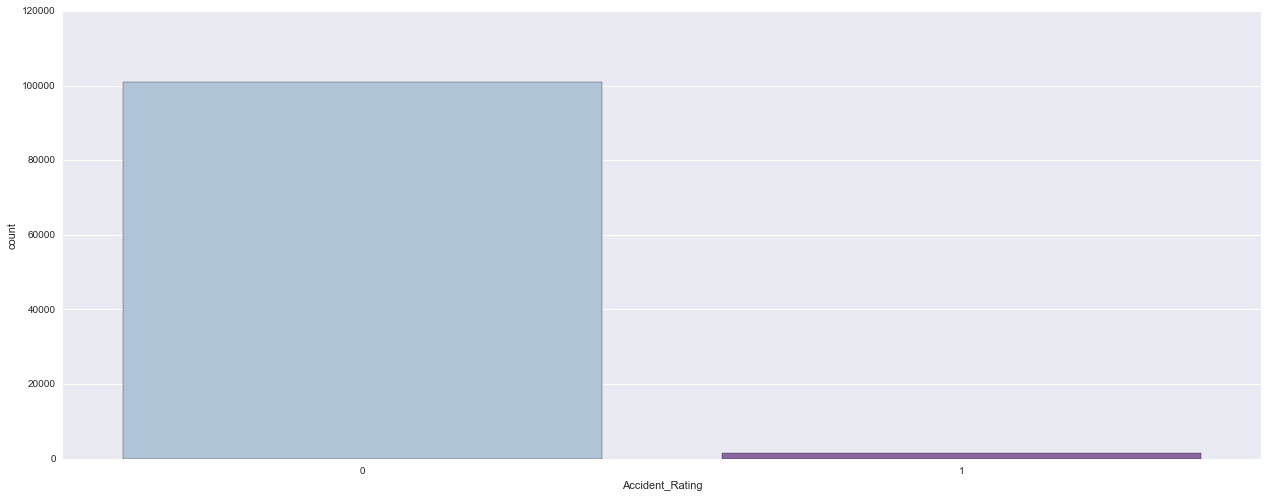

In [10]:
df_sub = df

print 'Distribution of Different Accident Ratings'
sns.factorplot(x="Accident_Rating", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5)

Distribution of Different Car Colors


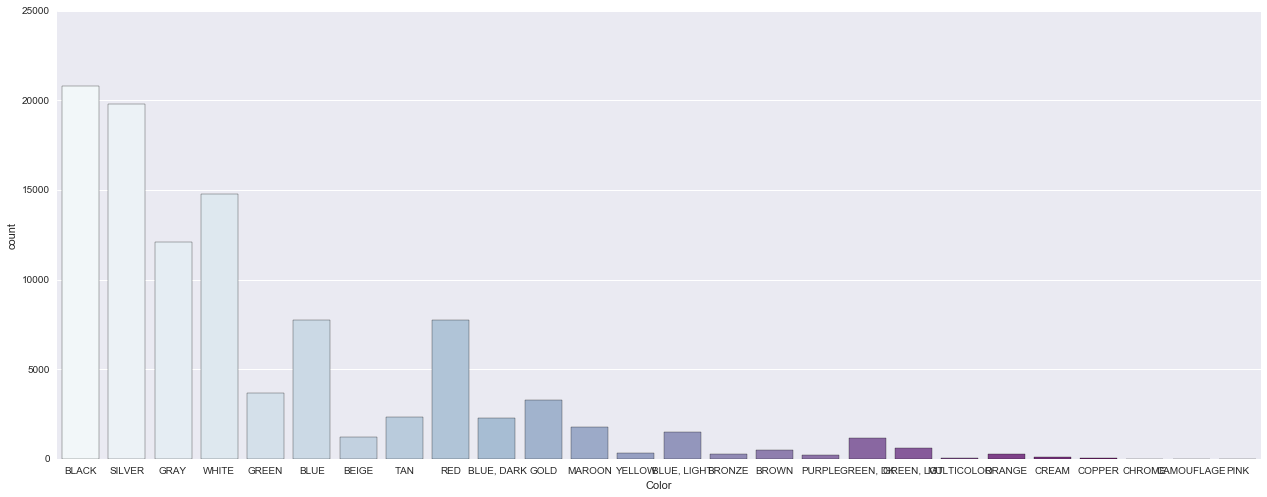

In [11]:
df_sub = df

print 'Distribution of Different Car Colors'
sns.factorplot(x="Color", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5)

Distribution of Different Car Colors


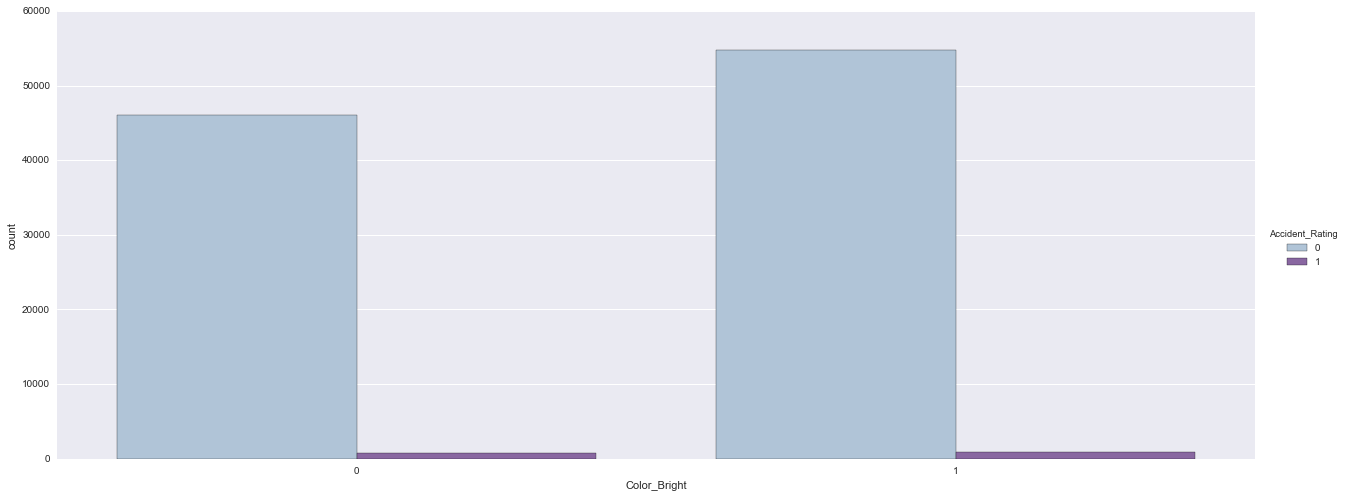

In [12]:
df_sub = df
print 'Distribution of Different Car Colors (Bright)'
sns.factorplot(x="Color_Bright", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5, hue="Accident_Rating")

Distribution of Different Car Colors


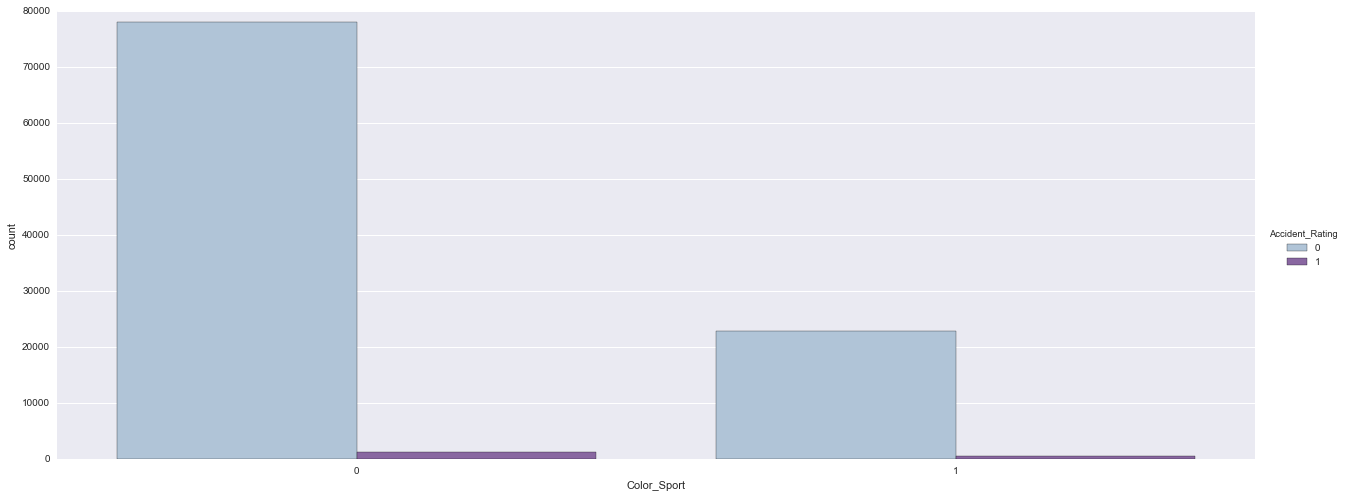

In [13]:
df_sub = df
print 'Distribution of Different Car Colors (Sports Color)'
sns.factorplot(x="Color_Sport", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5, hue="Accident_Rating")

Distribution of Different DL instate


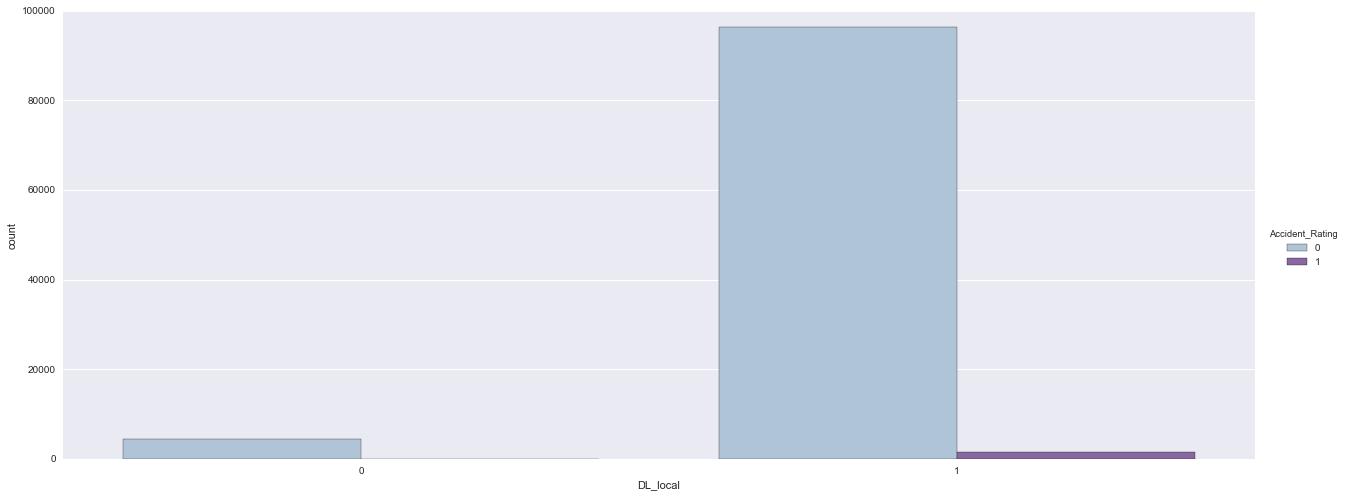

In [14]:
df_sub = df
print 'Distribution of DL Local / Non-Local'
sns.factorplot(x="DL_local", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5, hue="Accident_Rating")

Distribution of Different DL instate


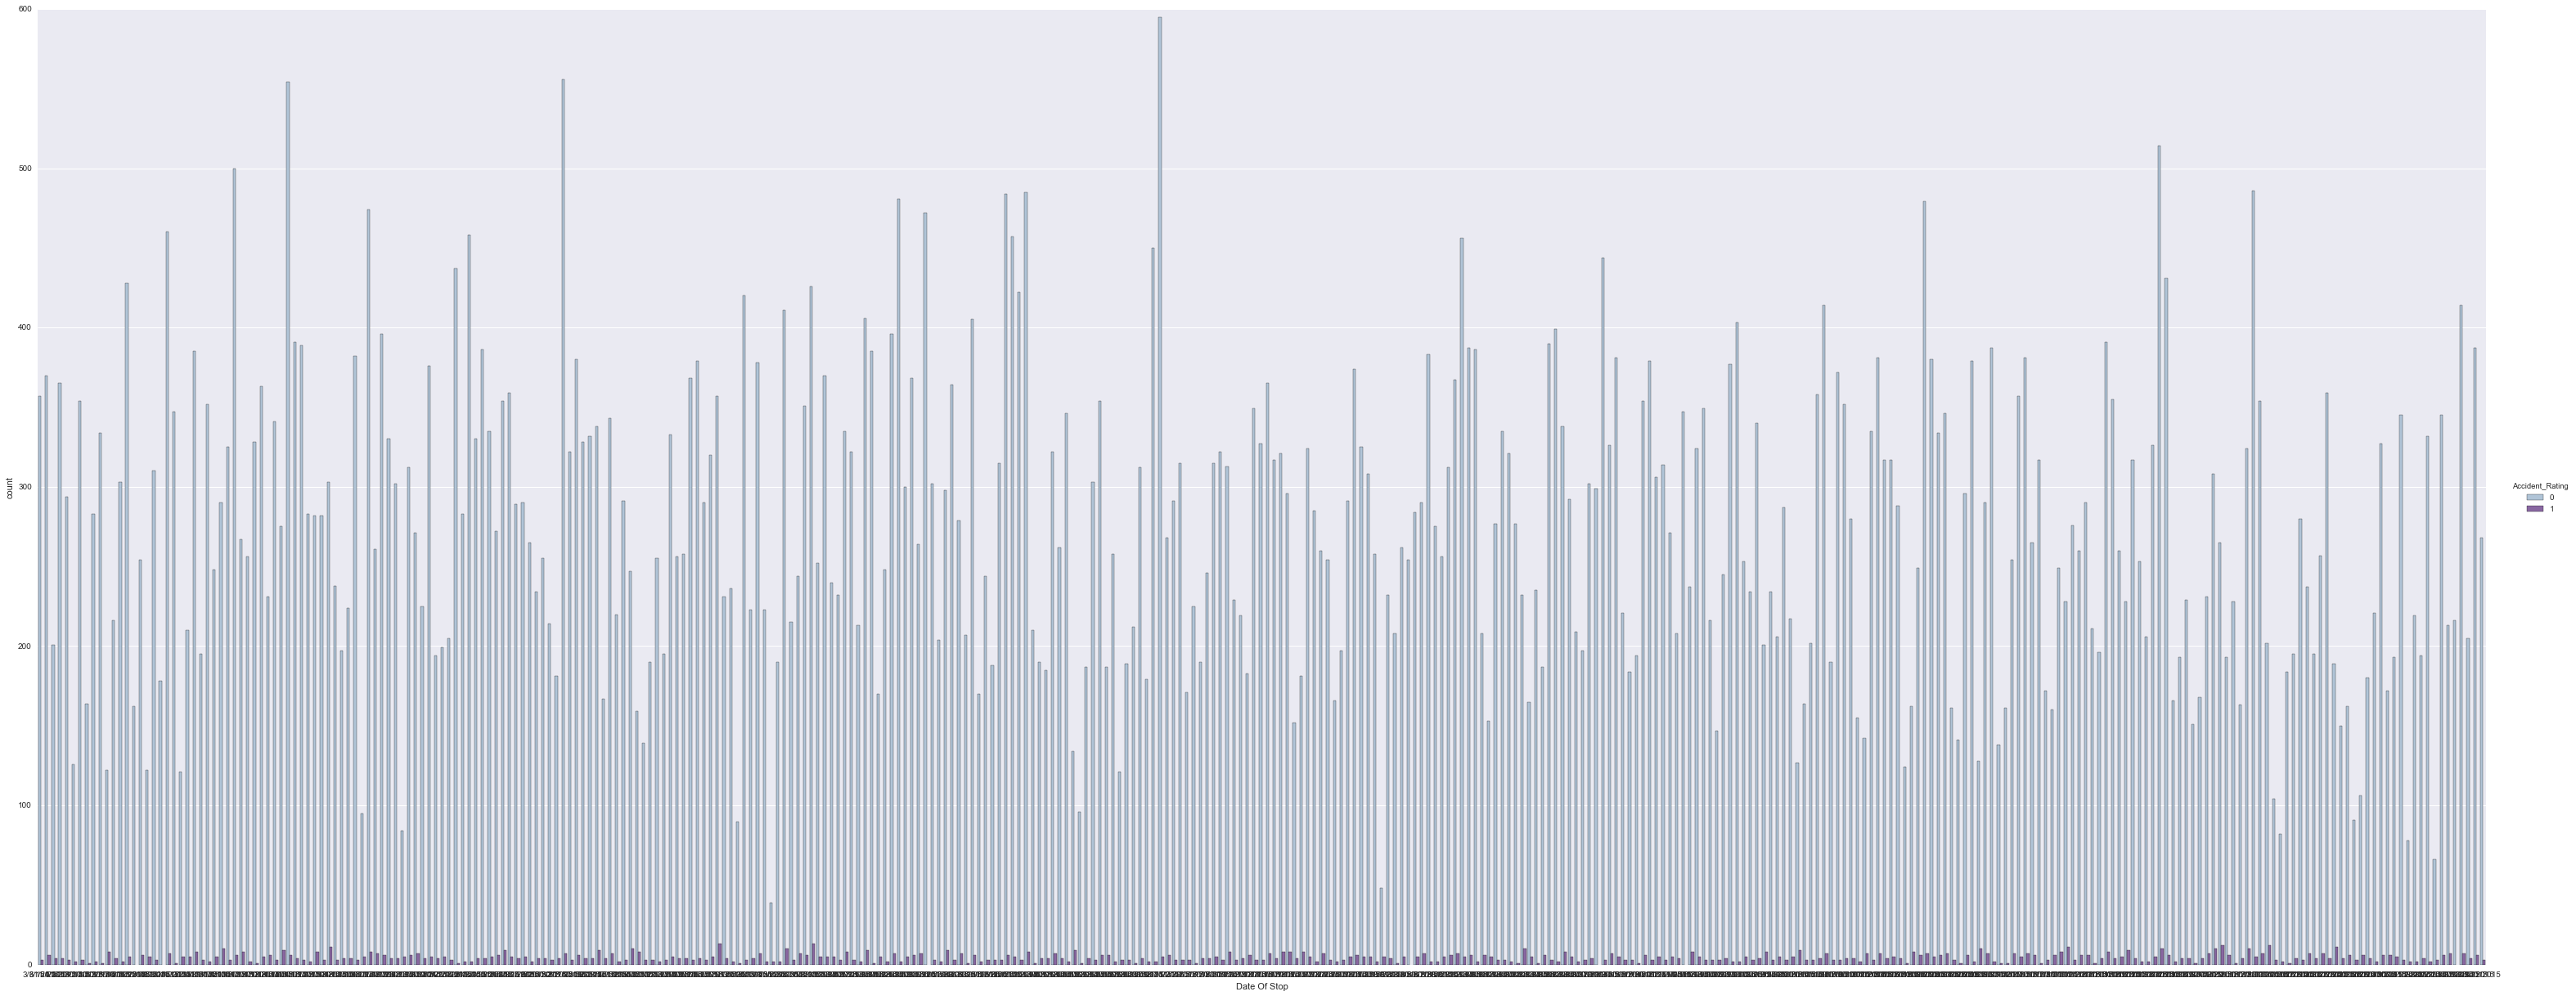

In [15]:
df_sub = df
print 'Distribution of Date of Stop (counts)'
sns.factorplot(x="Date Of Stop", data=df_sub, kind="count", palette="BuPu", size=17, aspect=2.5, hue="Accident_Rating")

Distribution of Different DL instate


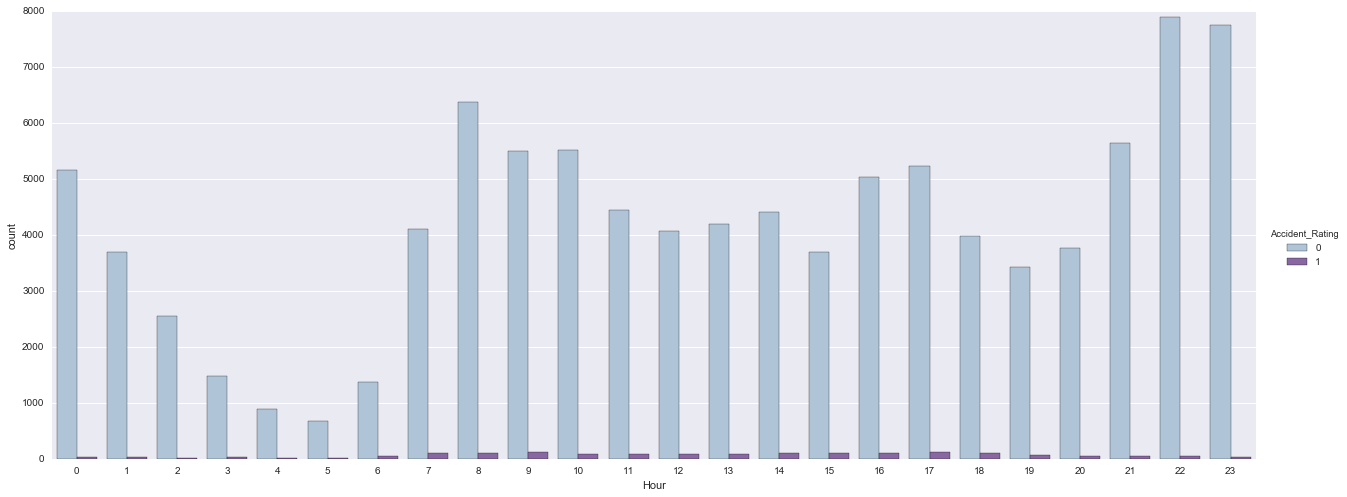

In [16]:
df_sub = df
print 'Distribution of Daily Hour'
sns.factorplot(x="Hour", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5, hue="Accident_Rating")

Distribution of Different DL instate


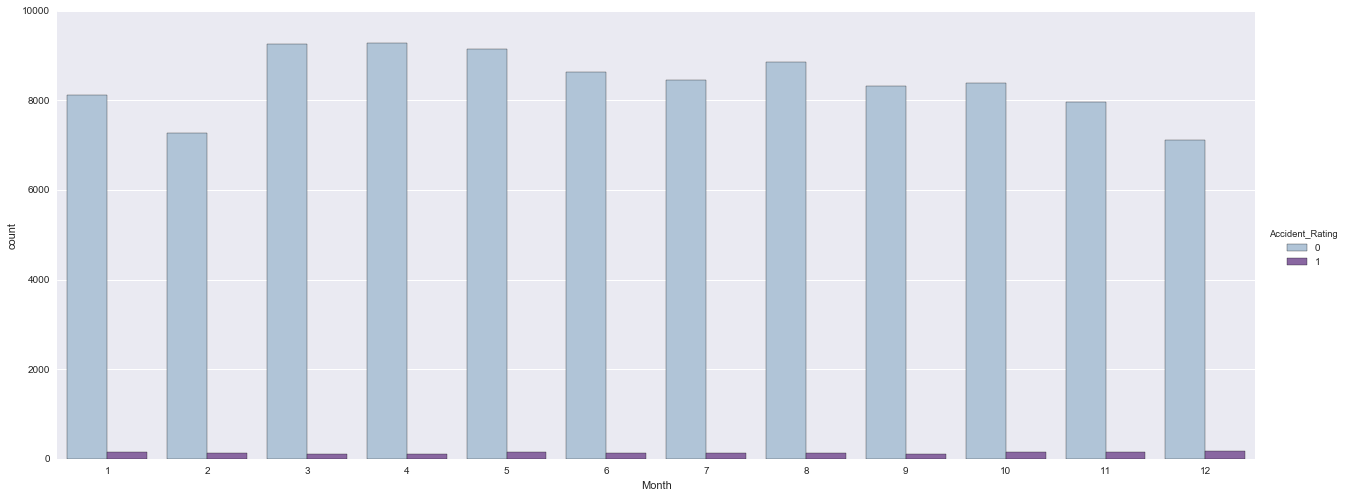

In [17]:
df_sub = df
print 'Distribution of Months'
sns.factorplot(x="Month", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5, hue="Accident_Rating")

In [ ]:
df_sub = df
print 'Distribution of Car Years (Not-grouped)'
sns.factorplot(x="Car_Year", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5, hue="Accident_Rating")

Distribution of Car Years


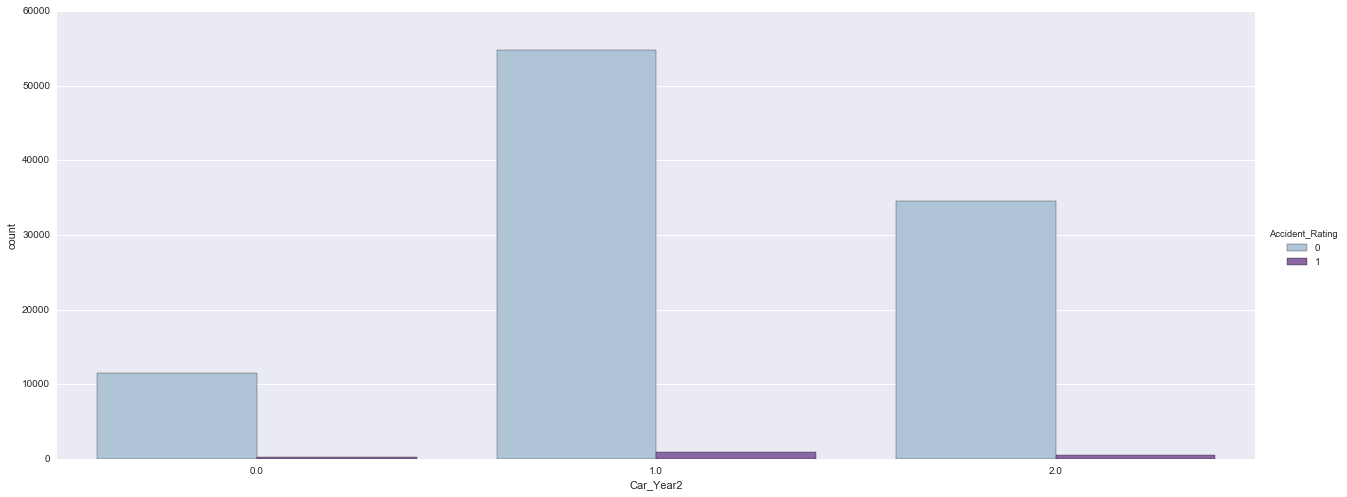

In [18]:
df_sub = df
print 'Distribution of Car Years (Grouped)'
sns.factorplot(x="Car_Year2", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5, hue="Accident_Rating")

In [19]:
# here we are normalizing the make counts by their marketshare percentage

df_count = pd.DataFrame()
df_count['0'] = df[df.Accident_Rating == 0].groupby('Make').Make.count()
df_count['1'] = df[df.Accident_Rating == 1].groupby('Make').Make.count()
df_count['0perc'] = 0
df_count['1perc'] = 0

for c in df_count.index:
    df_count['0perc'][c] = (df_count.loc[c][0])/make_perc[c]
    df_count['1perc'][c] = (df_count.loc[c][1])/make_perc[c]
    
print df_count.head()



C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


             0     1  0perc  1perc
Make                              
ACURA     3378  29.0   3671   31.0
AUDI       961   9.0    821    7.0
BMW       2689  34.0   1519   19.0
BUICK      739   8.0    564    6.0
CADILLAC   876  11.0    952   11.0


Distribution of Car Make


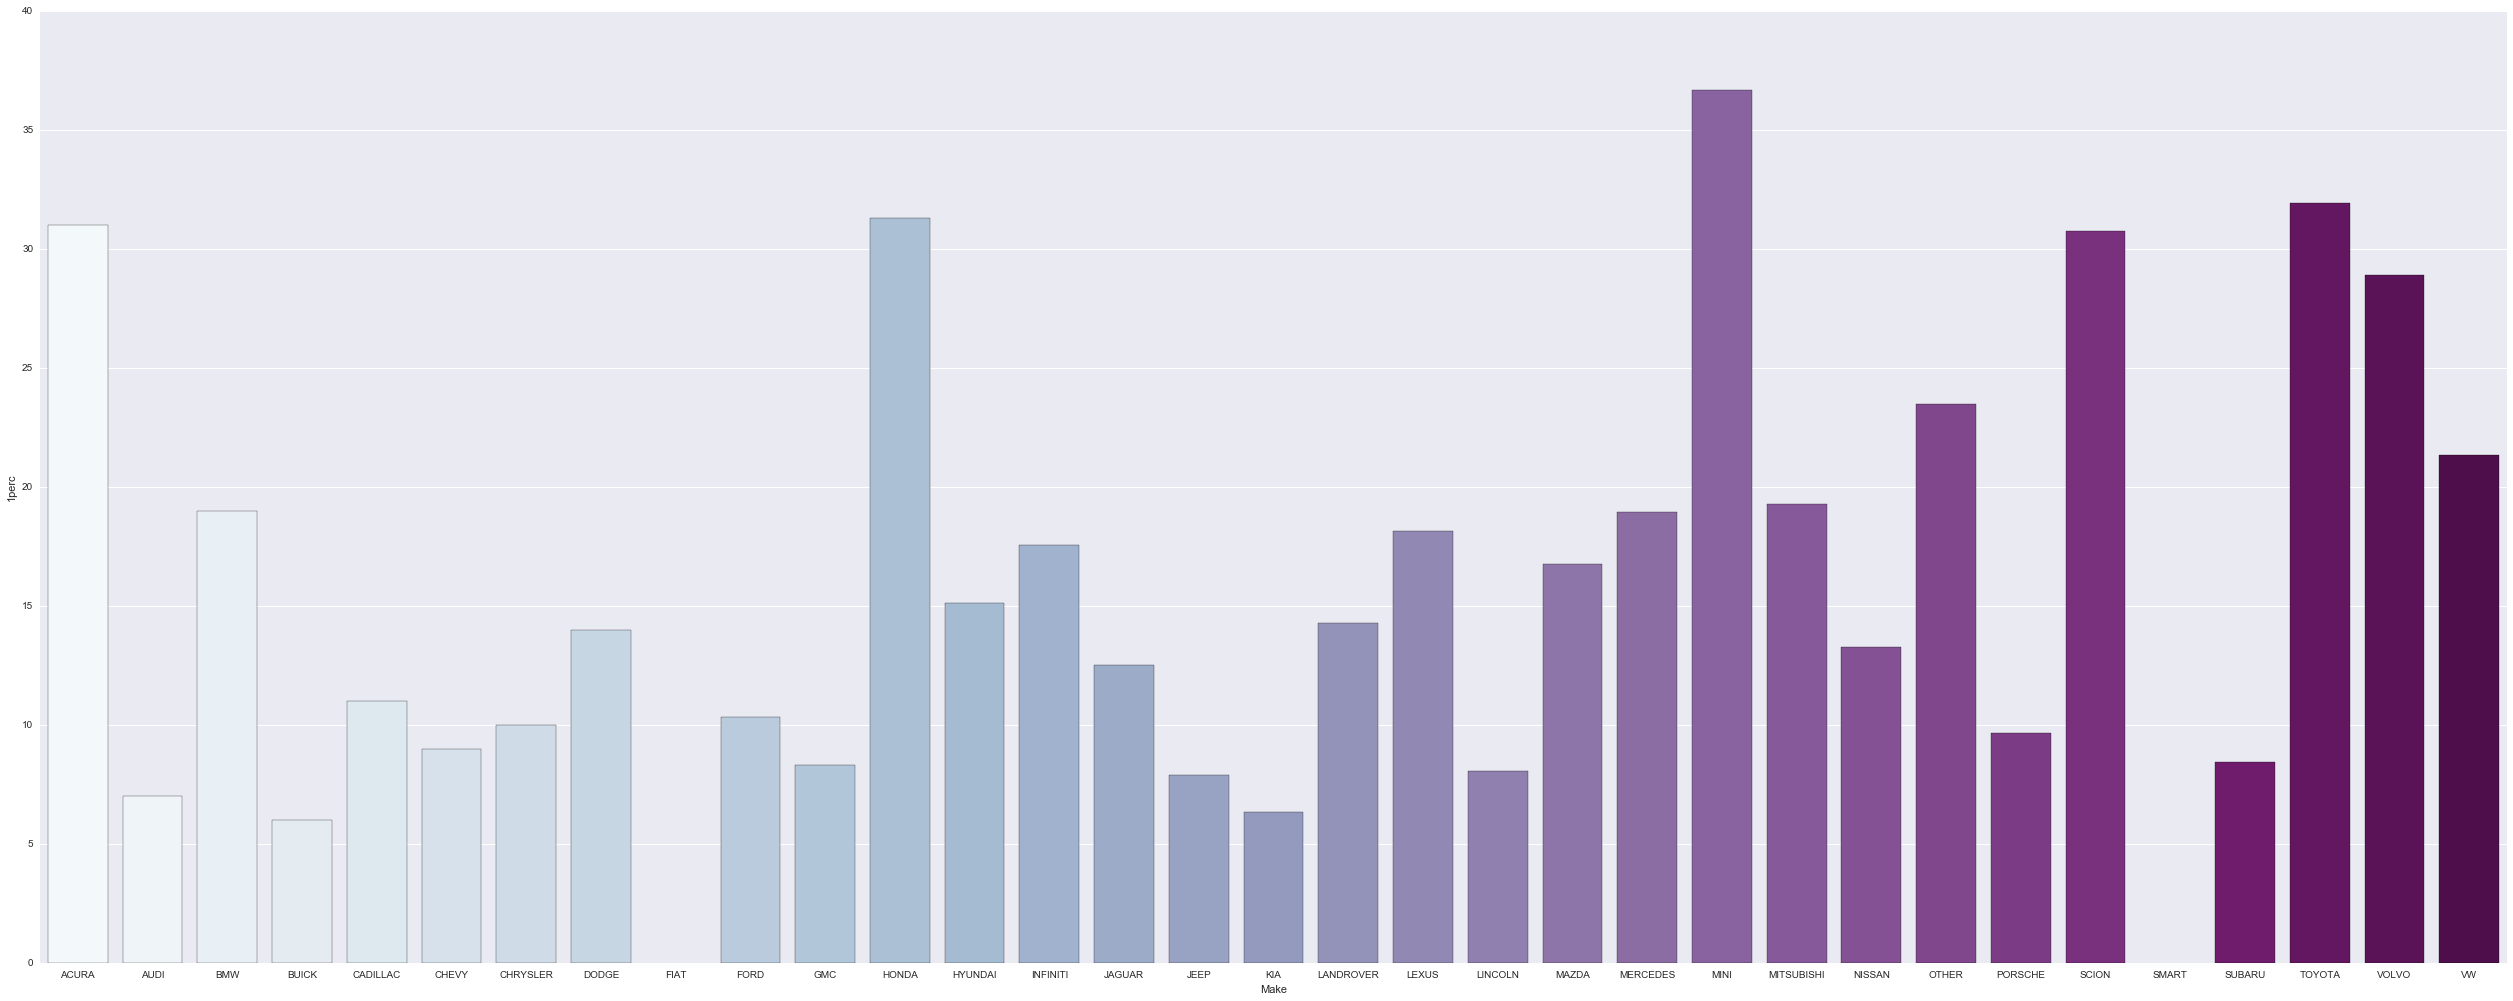

In [20]:
df_sub = df_count.reset_index()
print 'Distribution of Car Make (Normalized - Minor Violations)'
sns.factorplot(x="Make", y="1perc", data=df_sub, kind="bar", palette="BuPu", size=14, aspect=2.5)

Distribution of Car Make


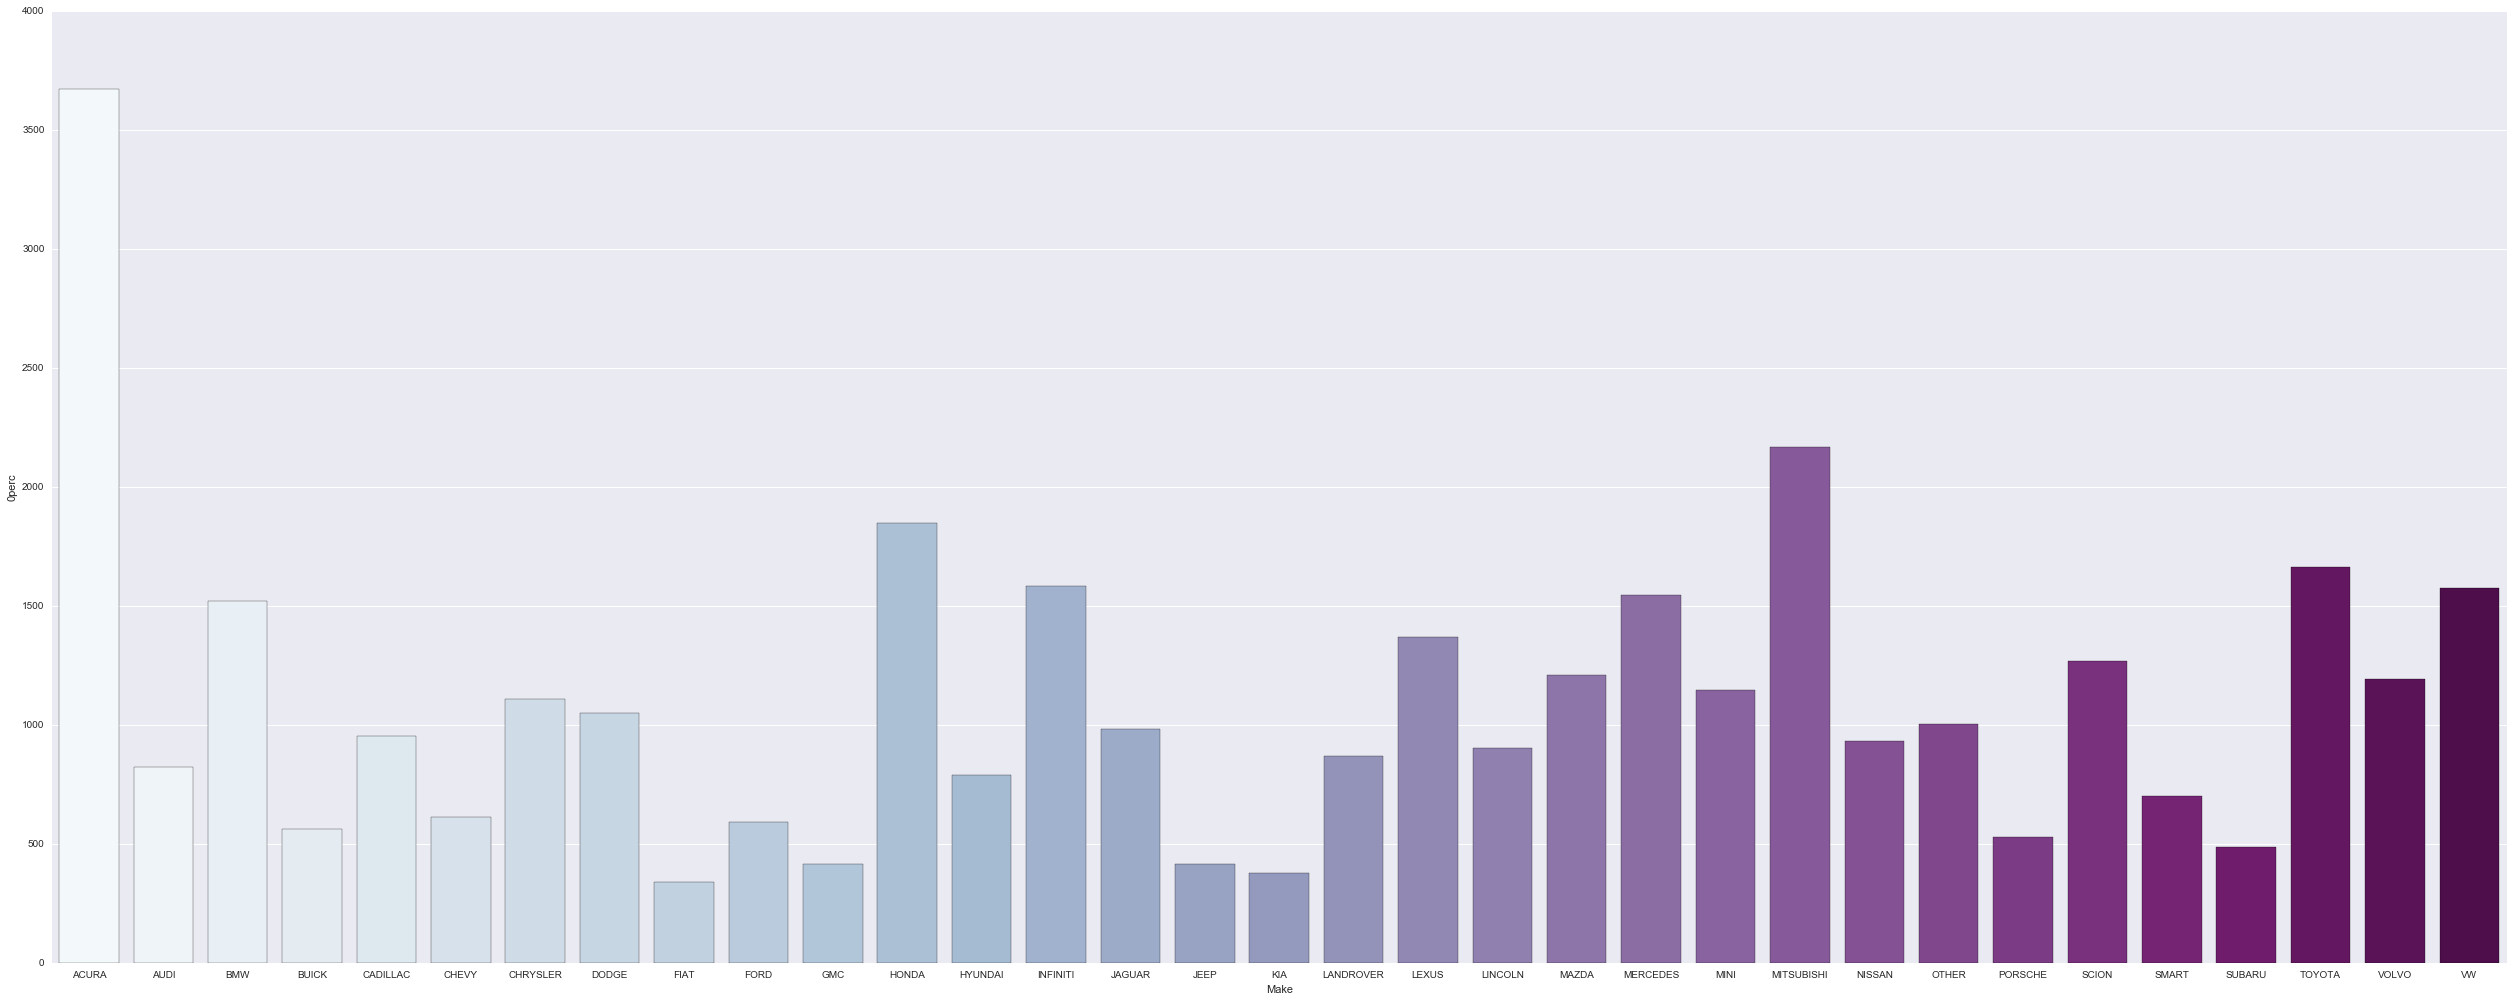

In [21]:
df_sub = df_count.reset_index()
print 'Distribution of Car Make (Normalized - Accidents)'
sns.factorplot(x="Make", y="0perc", data=df_sub, kind="bar", palette="BuPu", size=14, aspect=2.5)

Distribution of Car Make


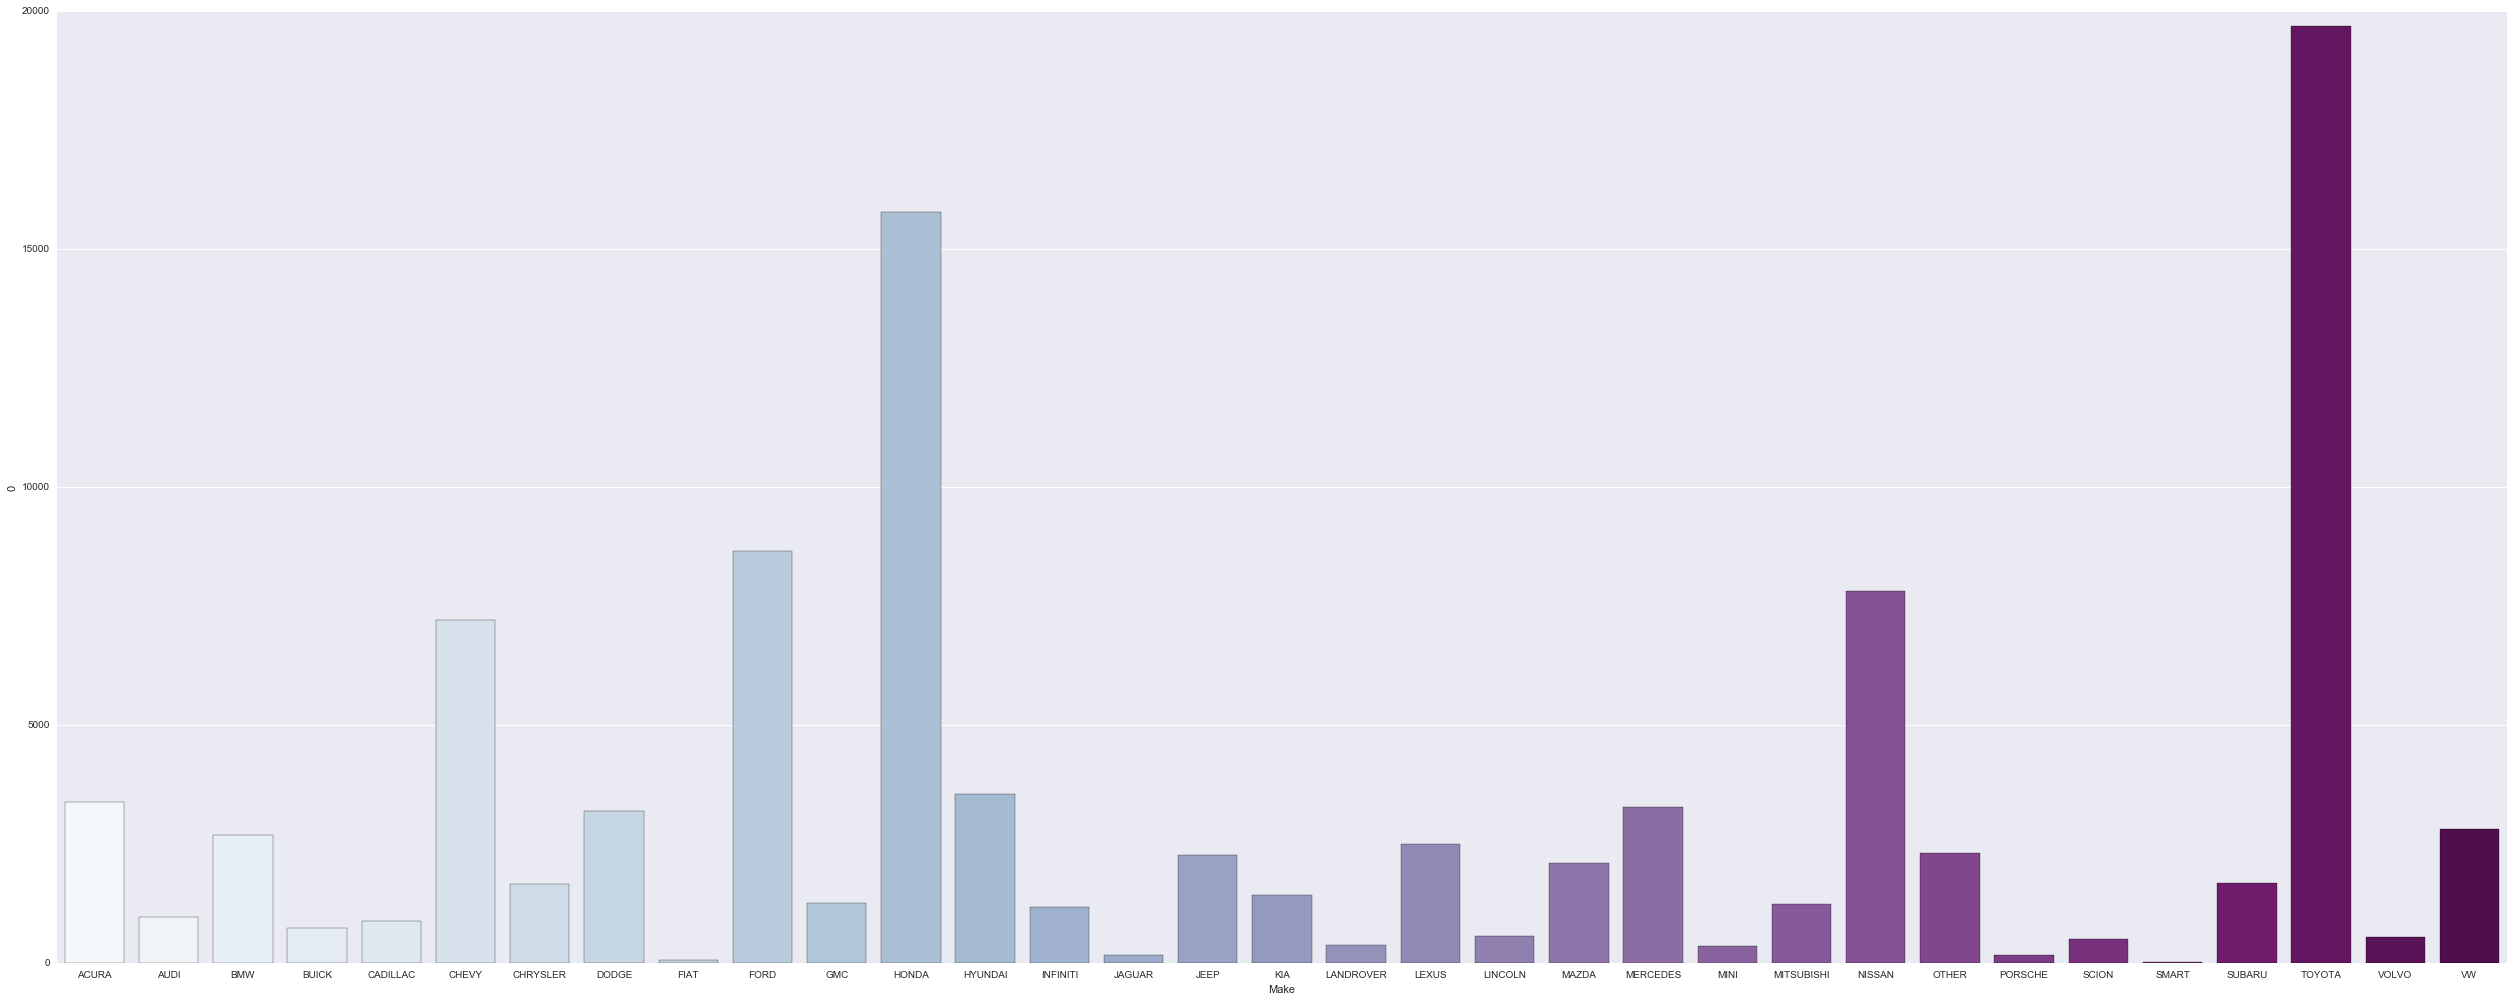

In [22]:
print 'Distribution of Car Make (Un-normalized - Minor Violations)'
sns.factorplot(x="Make", y="0", data=df_sub, kind="bar", palette="BuPu", size=14, aspect=2.5)

Distribution of Car Make


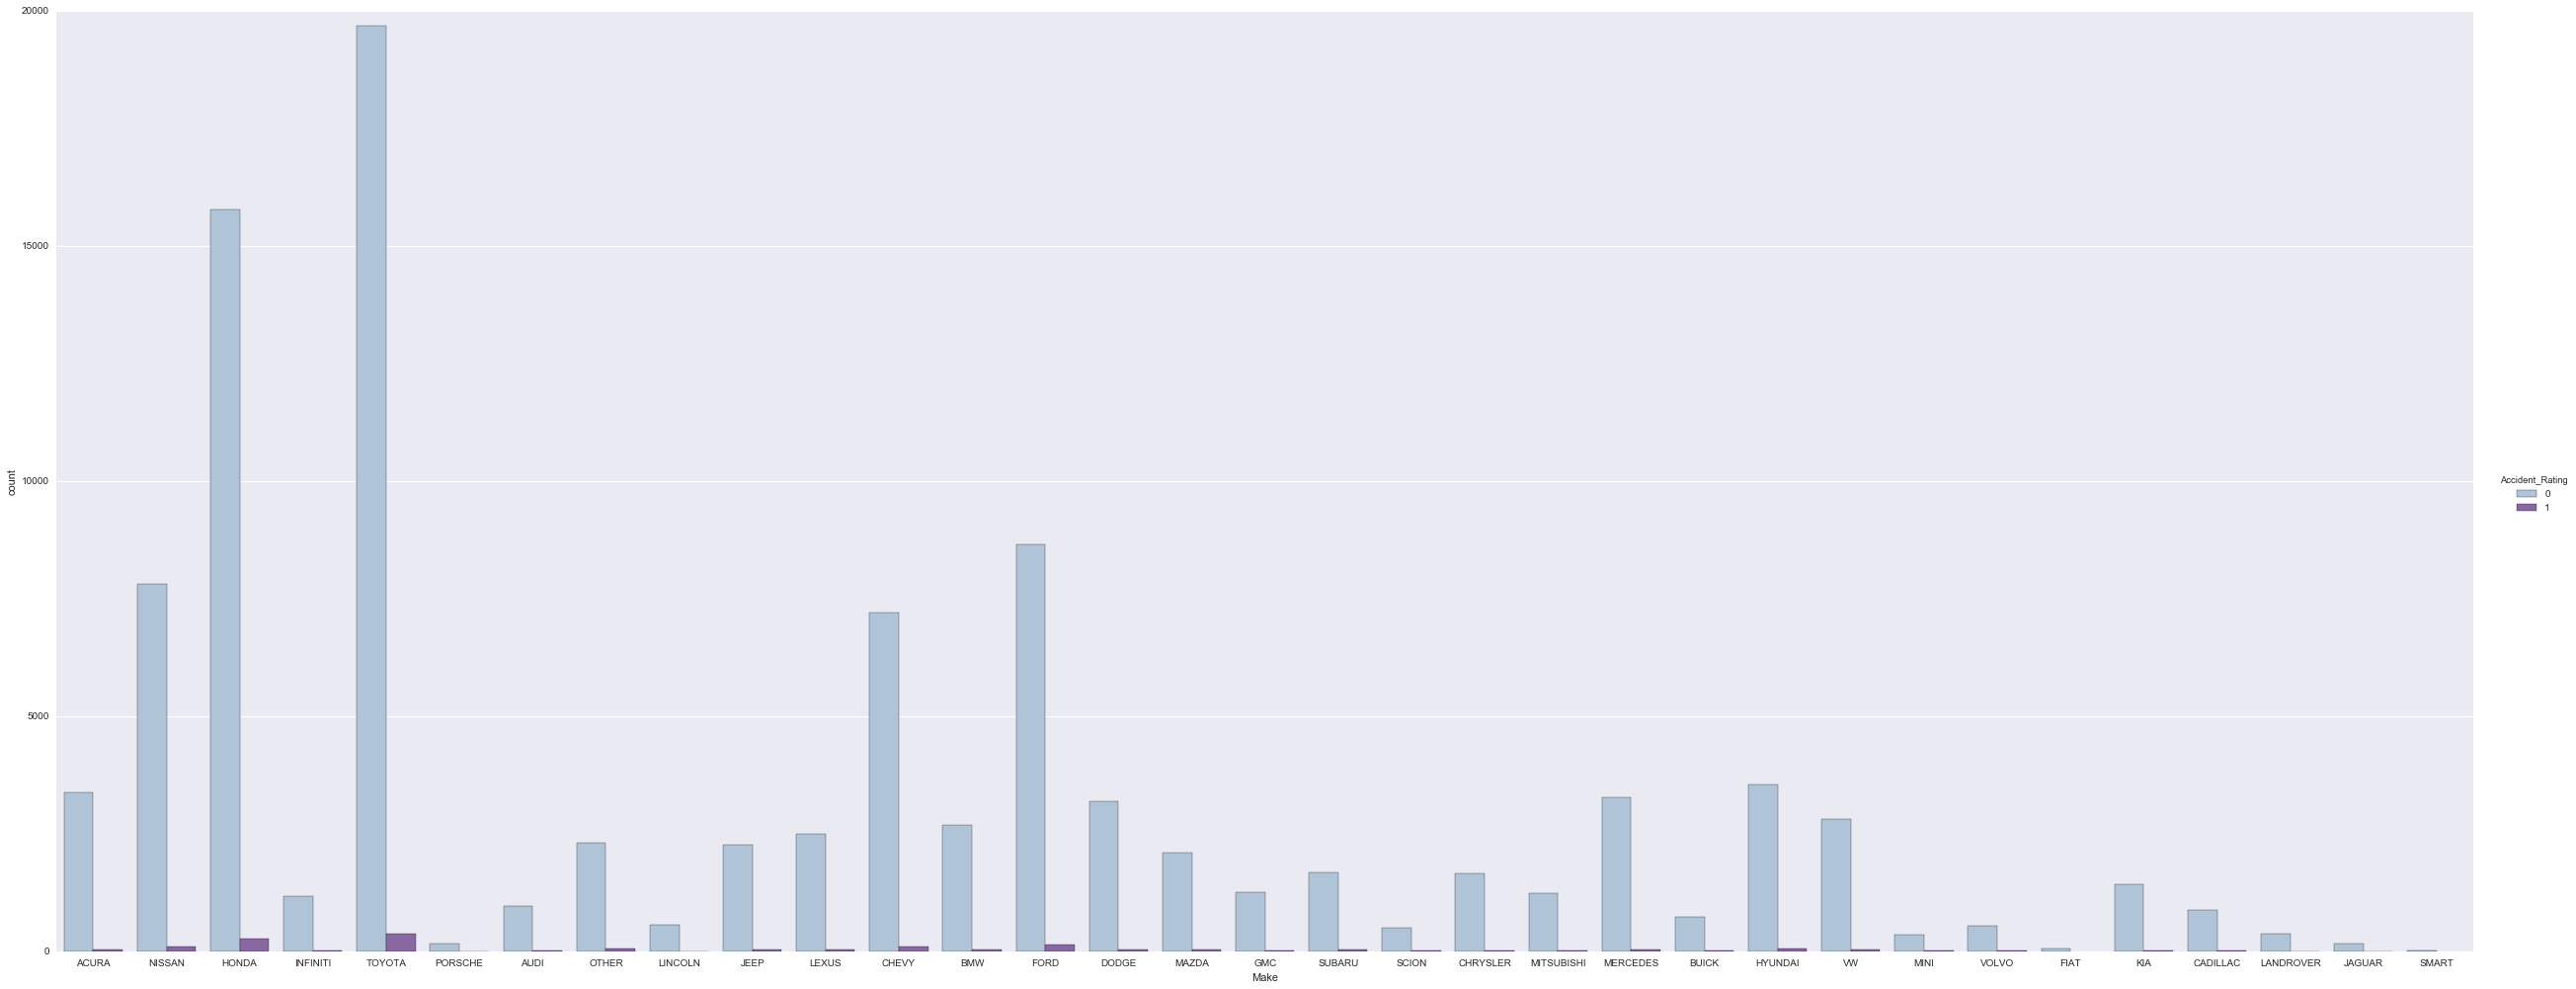

In [23]:
df_sub = df
print 'Distribution of Car Make (UnNormalized)'
sns.factorplot(x="Make", data=df_sub, kind="count", palette="BuPu", size=14, aspect=2.5, hue="Accident_Rating")

Distribution of Car Luxury


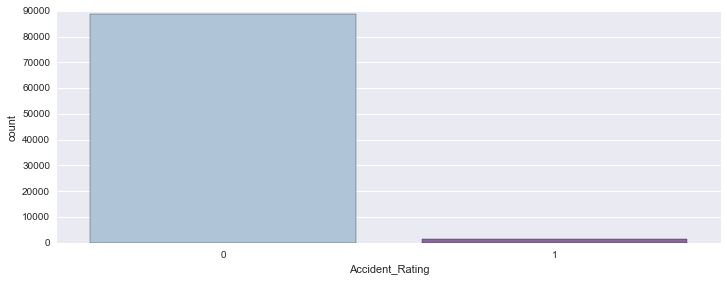

In [24]:
df_sub = df
print 'Distribution of Car Non-Luxury'
sns.factorplot(x="Accident_Rating", data=df_sub[df_sub.Make_Luxury == 0], kind="count", palette="BuPu", size=4, aspect=2.5)

Distribution of Car Luxury


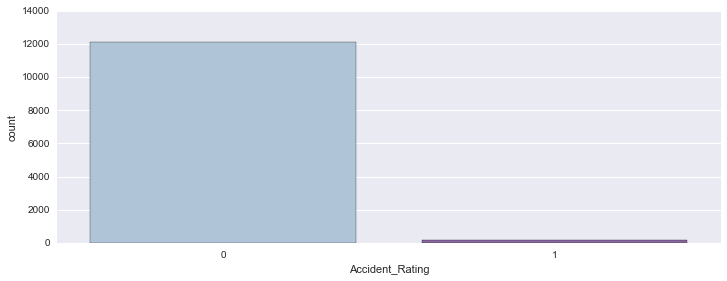

In [25]:
df_sub = df
print 'Distribution of Car Luxury'
sns.factorplot(x="Accident_Rating", data=df_sub[df_sub.Make_Luxury == 1], kind="count", palette="BuPu", size=4, aspect=2.5)

Distribution of Car Luxury


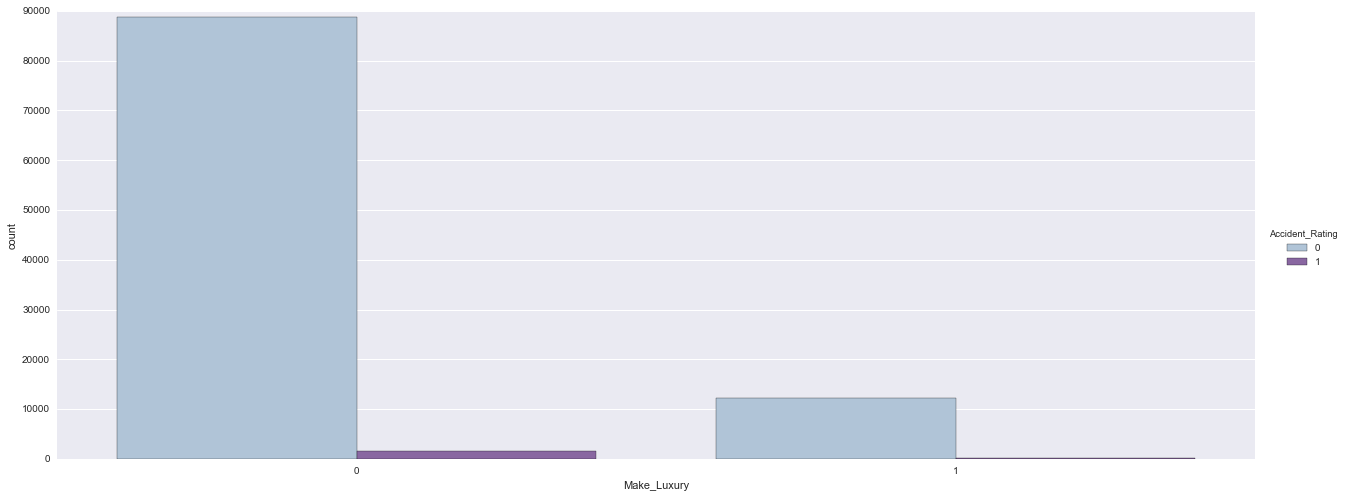

In [26]:
df_sub = df
print 'Distribution of Car Luxury'
sns.factorplot(x="Make_Luxury", data=df_sub, kind="count", palette="BuPu", size=7, aspect=2.5, hue="Accident_Rating")

# Decision Tree / Random Forest

In [27]:
df_sub = df.dropna()

#print df_sub.head()

#dum = pd.get_dummies(df_sub[['Color']], prefix="Color" )

#print dum.head()

# Let's grab all the variables and see what happens
#I played around with all the available variables here. See final presentation for what I did.
# Ultimately we want to drop Race and Gender, because it's unethical
X = df_sub[[
            #'Latitude','Longitude',
            #'Race_WHITE','Race_BLACK','Race_ASIAN','Race_HISPANIC',
            #'Month',
            'Hour',
            #'Car_Year2', 
            'Make_Luxury'
            #'Color_Bright','Color_Sport',
            #'DL_local'
            #'Gender_M','Gender_F'
           ]]
y = df_sub.Accident_Rating

#print X.head()

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

# Initializing and training my decision tree
tree_c = tree.DecisionTreeClassifier(max_depth=10, class_weight={0:1, 1:10}) #limit depth for now to speed up rendering
tree_c.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

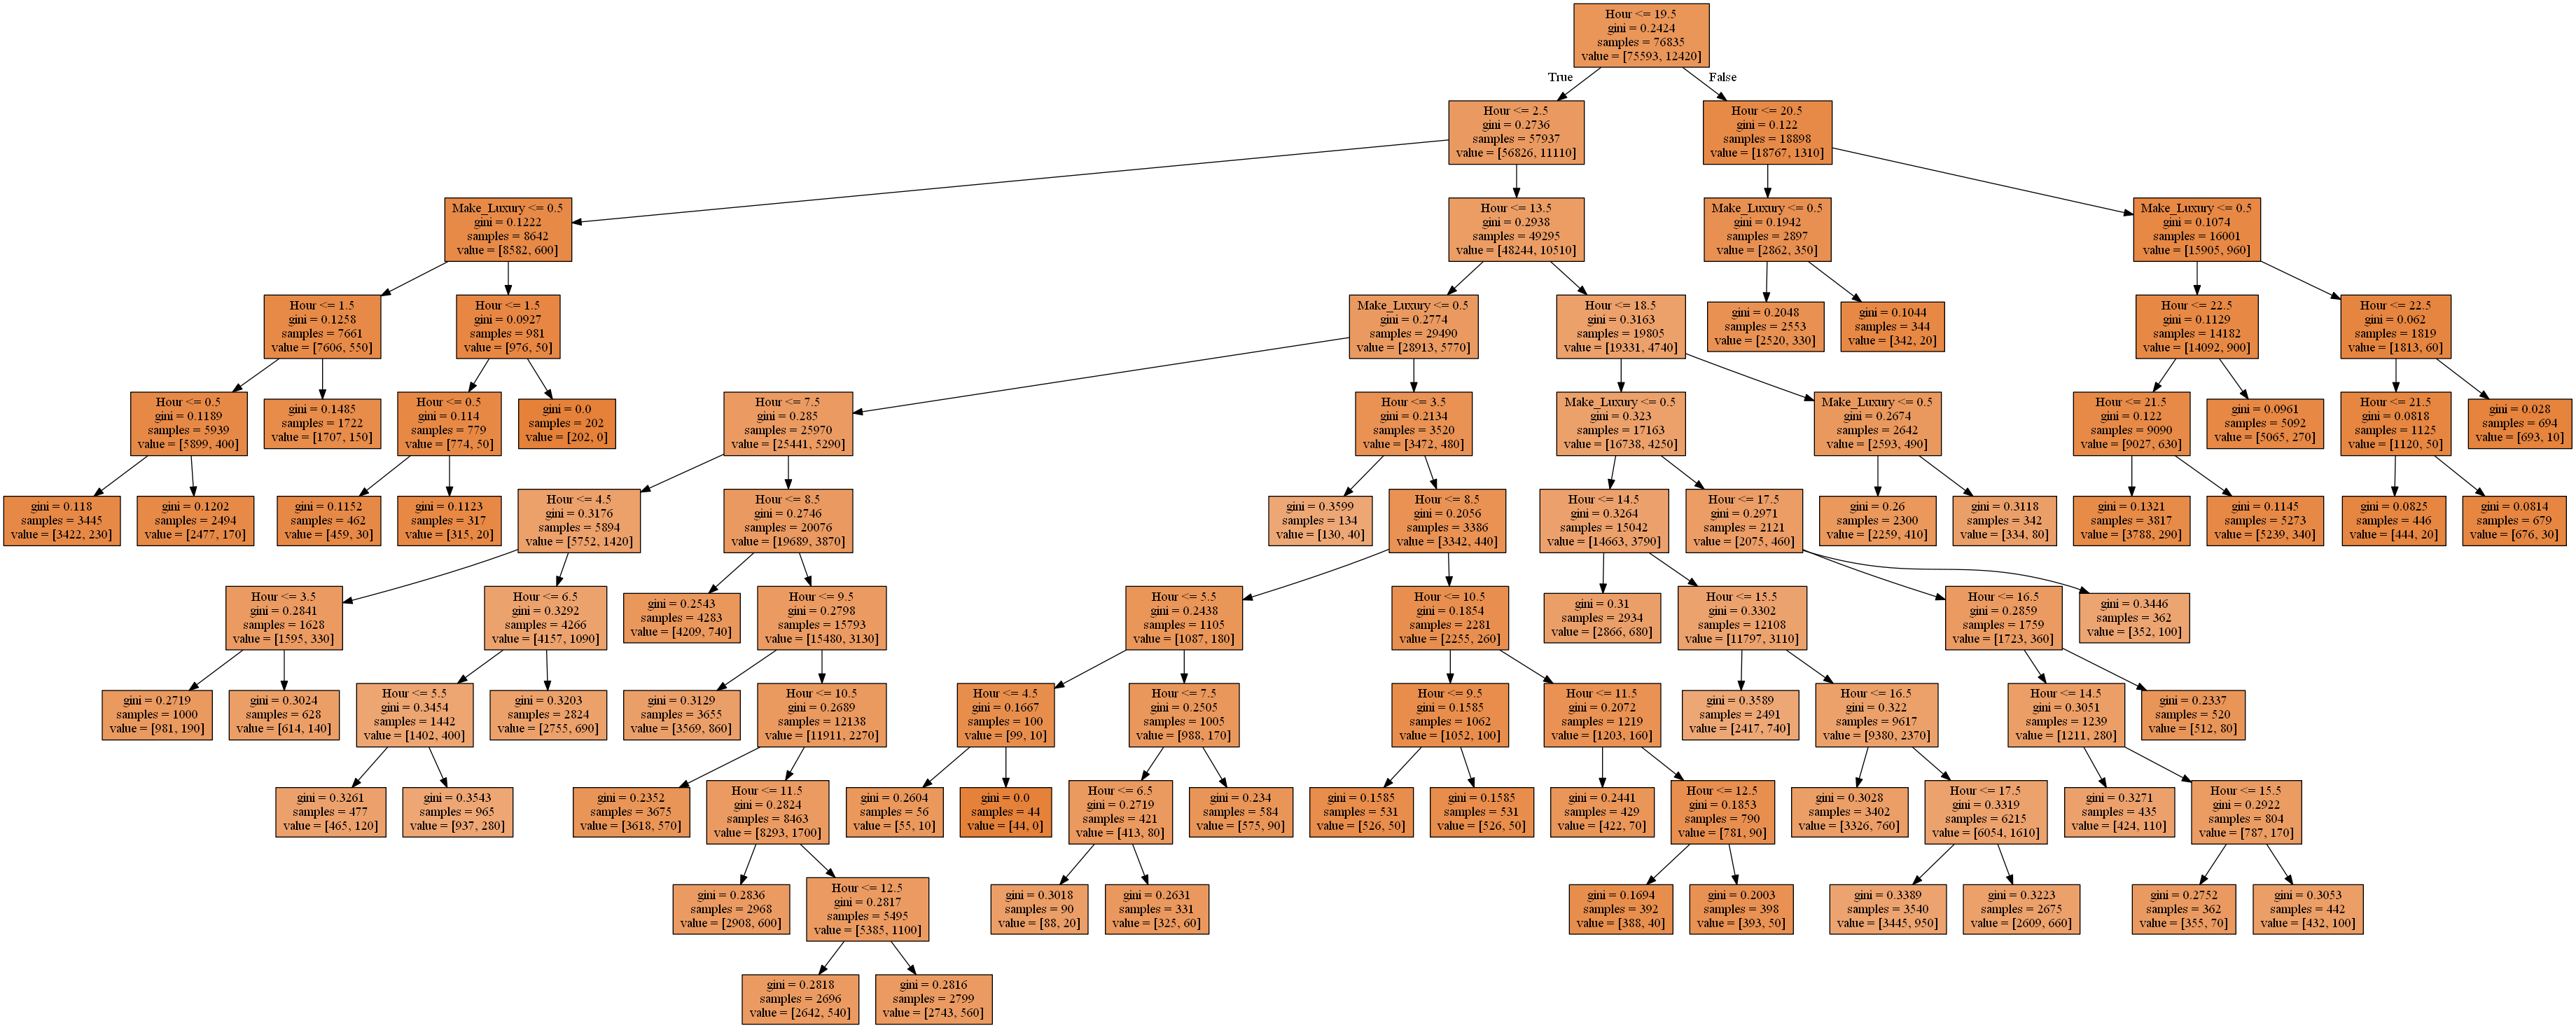

In [28]:
tree.export_graphviz(tree_c, out_file='tree.dot', feature_names=X.columns, filled=True)

os.system('dot -Tpng tree.dot -o tree.png')

Image('tree.png')

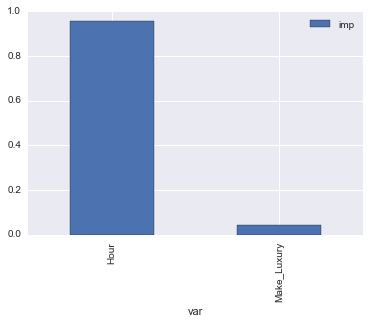

In [29]:
var_imp = pd.DataFrame({'var': X.columns, 'imp': tree_c.feature_importances_})
var_imp = var_imp.sort_values('imp', ascending=False)
var_imp.plot(x='var', y='imp', kind='bar')

In [30]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print 'ROC AUC', metrics.roc_auc_score(y_test, rf_preds)
print 'Accuracy', metrics.accuracy_score(y_test, rf_preds)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y_test, rf_preds)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y_test, rf_preds)

#how to optimize for higher accident rating?

ROC AUC 0.5
Accuracy 0.985085116352
Misclassification Rate 0.0149148836483
Adjusted Rand Score 0.0


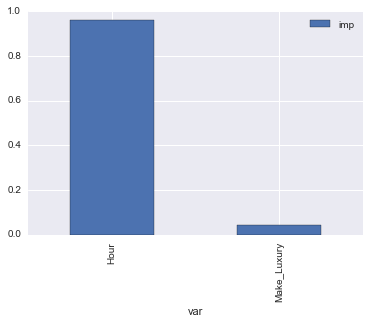

In [31]:
var_imp2 = pd.DataFrame({'var': X.columns, 'imp': rf.feature_importances_})
var_imp2 = var_imp2.sort_values('imp', ascending=False)
var_imp2.plot(x='var', y='imp', kind='bar')

In [32]:
n_1 = np.arange(1,5)
n_2 = np.arange(1,5)
n_3 = np.arange(2,5)
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(criterion='gini', class_weight={0:1, 1:100}),
    param_grid={
                'n_estimators':[3],
                'min_samples_leaf': n_2,
                'min_samples_split':[2]
               },
    scoring = 'roc_auc',
    cv=5,
)
gs.fit(X, y)

print gs.best_score_
print gs.best_params_
print gs.best_estimator_

#stratification

0.611136511304
{'min_samples_split': 2, 'n_estimators': 3, 'min_samples_leaf': 2}
RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 100},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


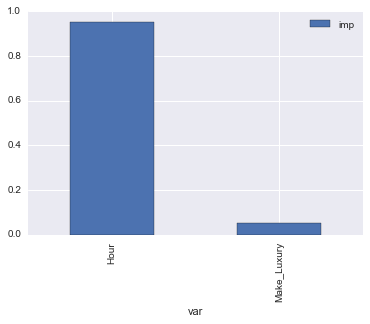

In [33]:
var_imp2 = pd.DataFrame({'var': X.columns, 'imp': gs.best_estimator_.feature_importances_})
var_imp2 = var_imp2.sort_values('imp', ascending=False)
var_imp2.plot(x='var', y='imp', kind='bar')

# Time Series Analysis

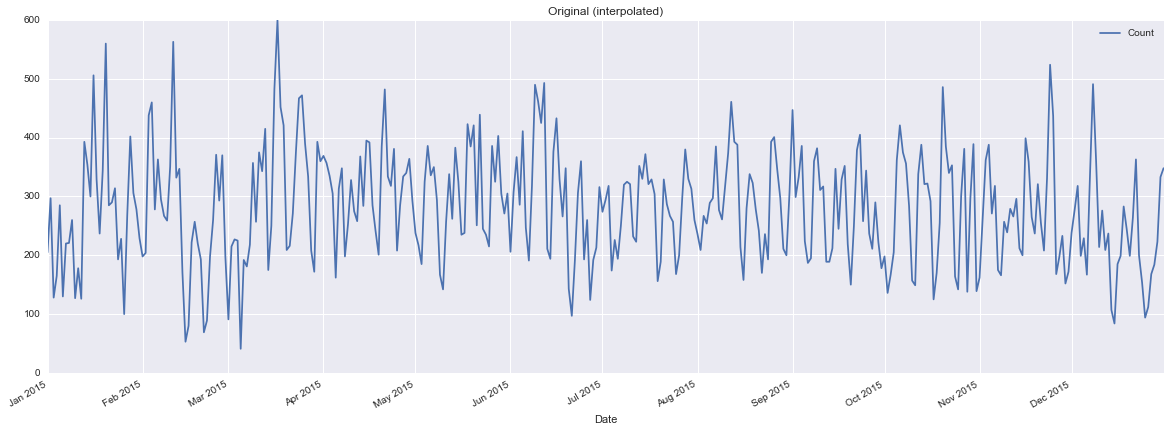

In [34]:
#Time series analysis
#Grouping to generate counts and re-indexing
df_count = pd.DataFrame()
df_count['Count'] = df.groupby('Date Of Stop').Make.count()
df_count = df_count.reset_index()

df_count['Date'] = pd.to_datetime(df_count['Date Of Stop'])

df_count  = df_count.drop('Date Of Stop', axis=1)

df_count['Count'] = df_count['Count'].astype(float)

df_count.set_index('Date', inplace=True)
df_count = df_count.dropna().interpolate()

f = (20,7)
df_count.plot(figsize=f)
plt.title('Original (interpolated)')
plt.show()

Axes(0.125,0.2;0.775x0.7)
6.21246557166e-05


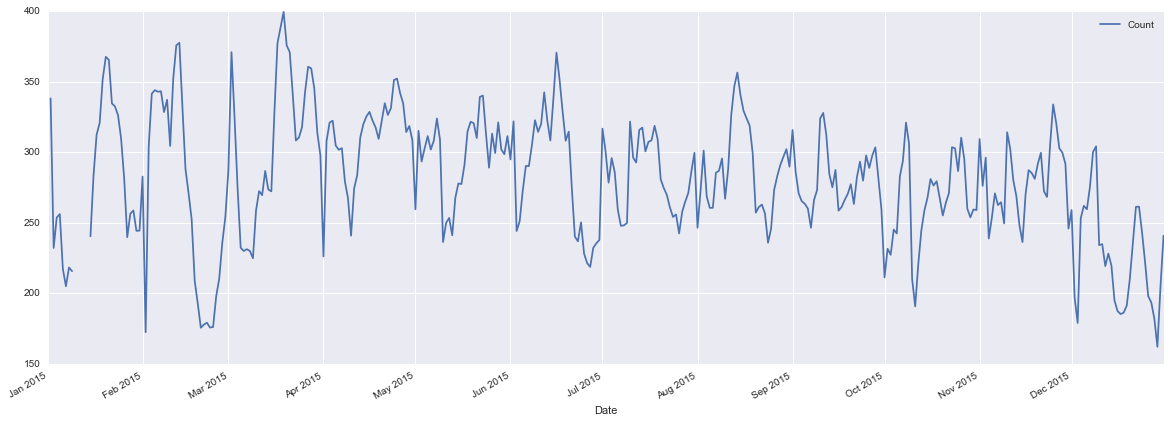

In [35]:
d = df_count.rolling(window=7)
print d.mean().plot(figsize=f)
print sm.tsa.adfuller(df_count['Count'])[1]

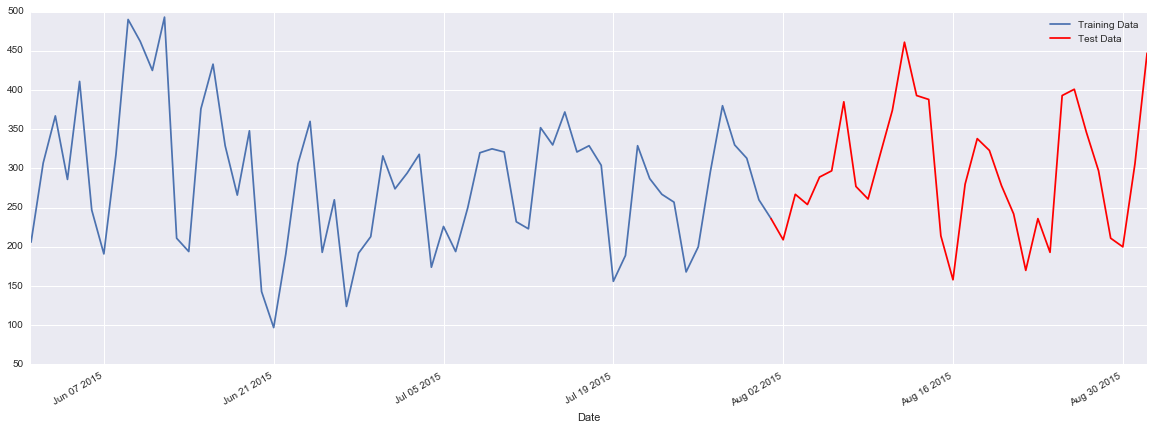

In [46]:
start = '20150601'
cut = '20150801'
end = '20150901'

train_df = df_count[start:cut]
train_df.columns = ['Training Data']
test_df = df_count[cut:end]
test_df.columns = ['Test Data']

fig, ax = plt.subplots(figsize=f)
train_df.plot(ax=ax)
test_df.plot(ax=ax, color='red')

In [47]:
a = sm.tsa.ARMA(train_df, (7, 6), freq="D")
arma_model = a.fit(method='css')
arma_model.summary2() 

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: ARMA
======================================================================
Model:                ARMA             BIC:                 664.8535  
Dependent Variable:   Training Data    Log-Likelihood:      -302.37   
Date:                 2016-11-05 12:22 Scale:               1.0000    
No. Observations:     62               Method:              css       
Df Model:             14               Sample:              06-16-2015
Df Residuals:         41                                    08-01-2015
Converged:            0.0000           S.D. of innovations: 59.070    
AIC:                  634.7435         HQIC:                646.387   
----------------------------------------------------------------------
                     Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
----------------------------------------------------------------------
const               282.9659  21.5917 13.1053 0.0000 240.6470 325.2849
ar.L1.Training Data   0.8451   0.1456  5.8060 0.0000   0.5598   1.1304
ar.L2.Training Data  -0.3492   0.2494 -1.3998 0.1691  -0.8380   0.1397
ar.L3.Training Data  -0.2966   0.2297 -1.2913 0.2038  -0.7469   0.1536
ar.L4.Training Data   0.4793   0.1191  4.0257 0.0002   0.2460   0.7127
ar.L5.Training Data  -0.6208   0.1107 -5.6100 0.0000  -0.8377  -0.4039
ar.L6.Training Data   0.2538   0.1699  1.4943 0.1428  -0.0791   0.5868
ar.L7.Training Data   0.1879   0.1677  1.1205 0.2690  -0.1408   0.5166
ma.L1.Training Data  -0.6744   0.2003 -3.3661 0.0017  -1.0670  -0.2817
ma.L2.Training Data   0.4403   0.0869  5.0660 0.0000   0.2699   0.6106
ma.L3.Training Data   0.2652   0.1547  1.7147 0.0940  -0.0379   0.5684
ma.L4.Training Data  -0.5287   0.0711 -7.4379 0.0000  -0.6680  -0.3894
ma.L5.Training Data   1.1000      nan     nan    nan      nan      nan
ma.L6.Training Data  -0.2207   0.2694 -0.8192 0.4174  -0.7486   0.3073
--------------------------------------------------------------------------------
                 Real            Imaginary           Modulus           Frequency
--------------------------------------------------------------------------------
AR.1            0.7486             -0.7289            1.0448             -0.1229
AR.2            0.7486              0.7289            1.0448              0.1229
AR.3            1.2330             -0.0000            1.2330             -0.0000
AR.4           -0.0593             -1.1114            1.1130             -0.2585
AR.5           -0.0593              1.1114            1.1130              0.2585
AR.6           -1.1247             -0.0000            1.1247             -0.5000
AR.7           -2.8376             -0.0000            2.8376             -0.5000
MA.1           -1.0000             -0.0000            1.0000             -0.5000
MA.2           -0.0651             -0.9979            1.0001             -0.2604
MA.3           -0.0651              0.9979            1.0001              0.2604
MA.4            0.7919             -0.6107            1.0000             -0.1045
MA.5            0.7919              0.6107            1.0000              0.1045
MA.6            4.5312             -0.0000            4.5312             -0.0000
======================================================================

"""

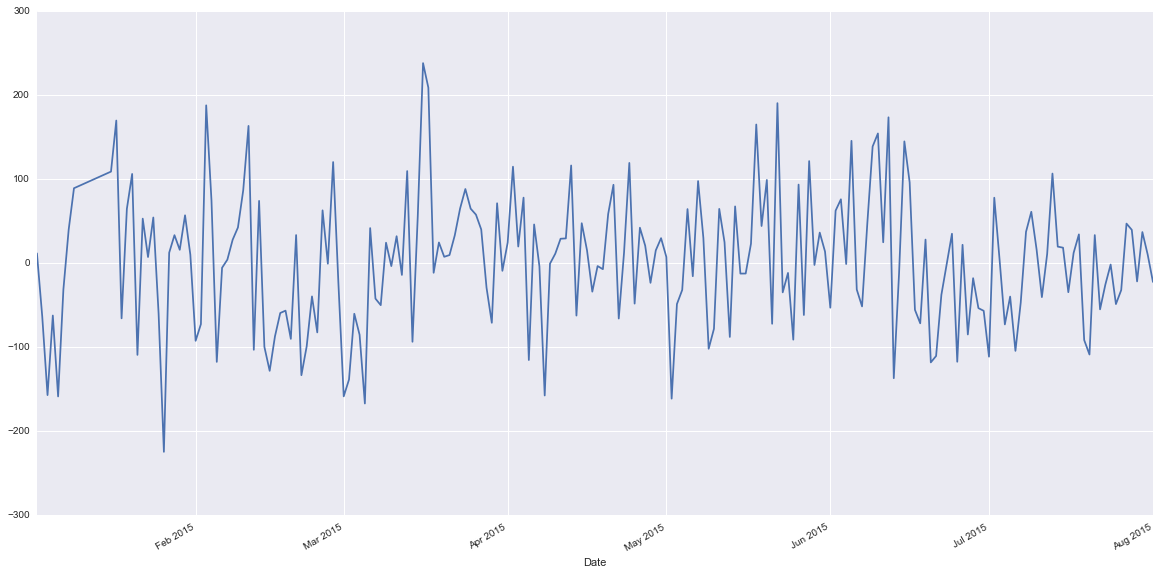

In [38]:

arma_model.resid.plot(figsize=(20,10))

20150801
20150808
904.733617113


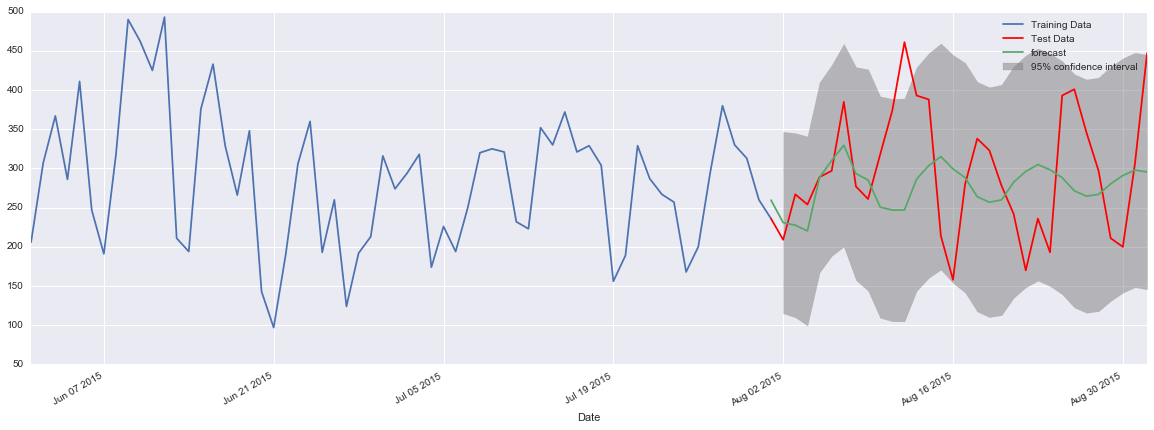

In [48]:
print str(int(cut)+0)
print str(int(cut)+7)
fig, ax = plt.subplots(figsize=f)
train_df.plot(ax=ax)
test_df.plot(ax=ax, c='red')
plotted = arma_model.plot_predict(cut, end, ax=ax, plot_insample=False)
ax.set_xlim(start,end)
print mean_squared_error(test_df['Test Data'][cut: str(int(cut)+7)], arma_model.predict(cut, str(int(cut)+7)))

In [40]:
bic_mat = sm.tsa.arma_order_select_ic(train_df, max_ar=12, max_ma=12, fit_kw={'method': 'css'})

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda2\lib\site-pac

In [41]:
bic_mat.bic

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2572.803806,2547.093032,2549.567217,2554.672525,2553.446908,2558.807908,2564.117758,2568.364262,2573.619737,2577.937080,2582.861846,2585.055910,2581.717415
1,2534.076281,2538.860383,2543.881123,2557.270076,2562.244297,2562.140608,2567.494850,2572.781367,2576.401163,2581.445492,2585.667450,2590.184721,2593.054452
2,2525.184599,2528.124527,2524.136480,2538.727654,2556.544204,2561.825892,2564.695285,2570.001102,2574.782042,2578.560911,2583.271292,2587.360240,2591.715051
3,2516.356134,2520.929775,2507.626145,2512.833238,2517.828404,2551.617062,2555.555853,2555.851245,2561.183991,2566.507027,2569.534914,2574.415116,2578.589203
4,2506.855525,2509.012428,2511.442598,2506.356783,2507.457009,2502.064406,2551.113731,2557.391285,2559.167349,2565.676258,2569.131218,2573.188915,2578.622220
5,2495.247264,2499.519726,2504.637188,2491.663311,2484.521138,2487.327237,2499.354282,2519.924144,2540.430634,2538.105810,2543.189258,2547.455845,2533.936630
6,2489.265869,2493.976929,2499.224433,2498.656511,2467.384925,2482.708424,2481.485800,2492.571197,2507.740927,2508.746236,2514.445372,2516.844828,2529.837551
7,2481.986133,2487.313562,2468.786293,2484.756777,2456.098164,2464.317116,2468.097263,2475.923307,2482.900099,2505.614174,2512.606578,2517.584568,2506.675455
8,2469.760256,2475.083217,2477.374643,2474.873911,2462.227641,2467.388101,2472.459249,2472.210859,2482.324291,2489.237027,2491.135532,2498.641039,2503.177783
9,2463.691595,2464.848754,2469.183999,2473.970933,2458.329458,2463.989527,2467.875167,2471.024745,2472.340675,2470.399860,2477.966135,2485.509402,2488.824591
